In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [403]:
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

# Which country pays the highest salary overall for Software Engineers

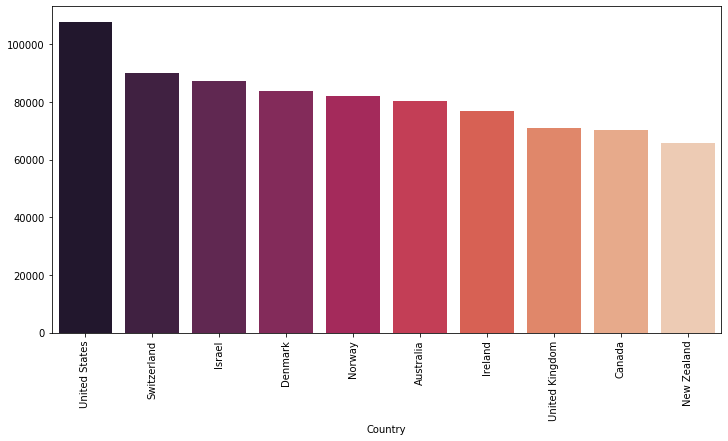

In [404]:
import seaborn as sns
# Remove rows without salary information
df.dropna(subset=['ConvertedComp'], axis=0, inplace=True)
salaries_by_country = df[df.ConvertedComp < 250000]
countries_outlier_clean = (salaries_by_country.groupby('Country')['ConvertedComp'].size() > 100)
countries_outlier_clean= countries_outlier_clean[countries_outlier_clean.values == True].index.tolist()

salaries_by_country = salaries_by_country[salaries_by_country['Country'].isin(countries_outlier_clean)]

salaries_by_country_series = salaries_by_country.groupby('Country')['ConvertedComp'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.xticks(plt.xticks()[0], salaries_by_country_series.index, rotation=90)
sns.barplot(x = salaries_by_country_series.index[:10], y = salaries_by_country_series.values[:10], palette='rocket');

- It appears the United States, Switzerland, and Israel pay the highest salaries.
- However we should also take competition into account. 
- For example, I live in Norway and even though U.S. has a higher annual salary, odds of finding a job in Norway is much higher than U.S. due to high demand in Software Engineers. 

# Does bigger companies pay more?

In [405]:
salaries_by_company_size = df.groupby('OrgSize')['ConvertedComp'].mean().sort_values(ascending=False)

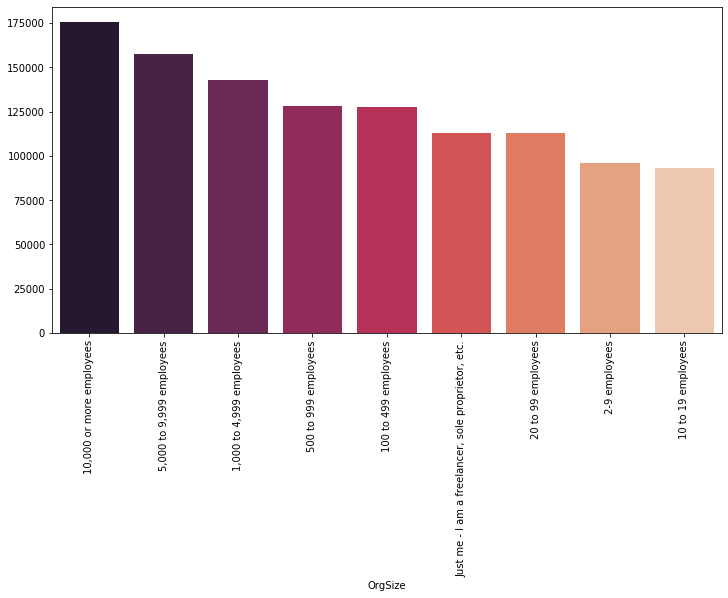

In [406]:
plt.figure(figsize=(12,6))
plt.xticks(plt.xticks()[0], salaries_by_company_size.index, rotation=90)
sns.barplot(x = salaries_by_company_size.index, y = salaries_by_company_size.values, palette='rocket');

- Yes. The salary increases with respect to number of employees for companies that have over 100+ organization size. 
- Under size 100, salaries seem pretty close for freelancers and 20-99 employees. 
- Again, sizes of 2-9 and 10-19 are very similar too. 

# Does education level have any influence on salary?

In [6]:
salaries_by_education = df.groupby('EdLevel')['ConvertedComp'].mean().sort_values(ascending=False)

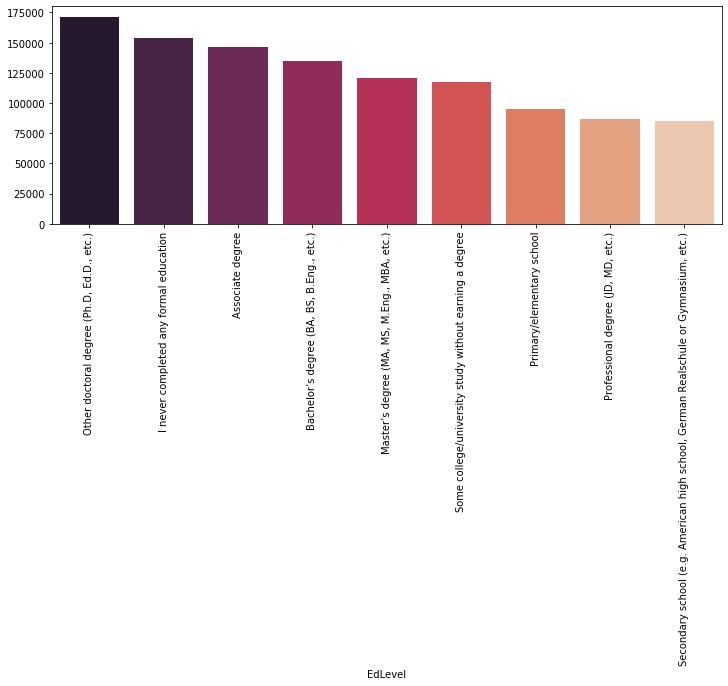

In [410]:
plt.figure(figsize=(12,4))
plt.xticks(plt.xticks()[0], salaries_by_education.index, rotation=90)
sns.barplot(x = salaries_by_education.index, y = salaries_by_education.values, palette='rocket');

- Results are very interesting. Those who have Ph.D get the highest salary. 
- The second highest is developers who have never completed any formal education. 
- Also salaries for B.S. degree is higher than Master's on average. 
- Salaries for associate degree is higher than B.S. as well.
- We can't really say that education level has a clear impact on salaries

# Bonus: Blockchain usage by Company Size

In [8]:
# Redefine df to bring back dropped rows
df = pd.read_csv('./survey_results_public.csv')
# Drop  missing rows that doesn't specify usage of blockchain at an organization
df.dropna(subset=['BlockchainOrg'], axis=0, inplace=True)

In [9]:
# Check percentage of missing values
df['OrgSize'].isna().sum() / len(df) * 100

2.8458744161909704

In [10]:
# We are only missing 2.84% of the rows. We can just fill them using the column mode
fill_mode = lambda col: col.fillna(col.mode())
df = df.apply(fill_mode, axis=0)

In [11]:
blockchain_by_company_size = df.groupby('BlockchainOrg')['OrgSize'].value_counts()

In [12]:
blockchain_by_company_size = blockchain_by_company_size.unstack(level=1)

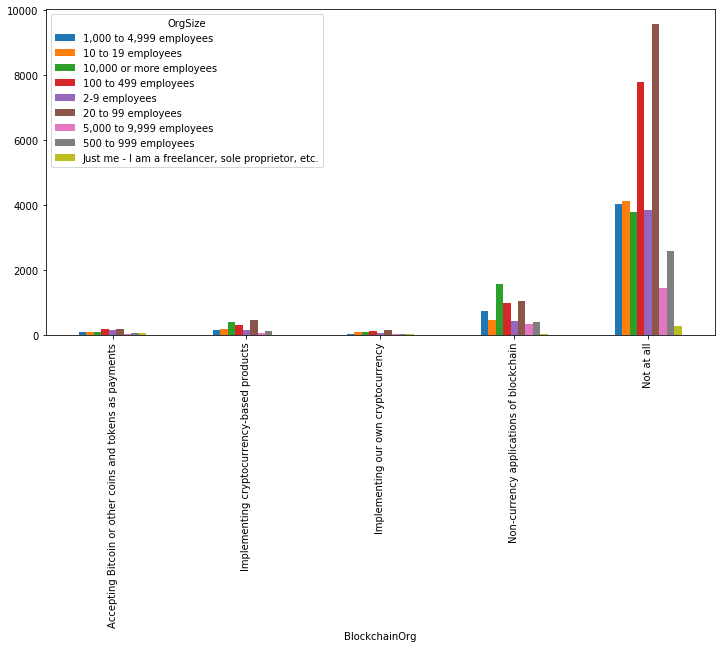

In [13]:
blockchain_by_company_size.plot.bar(figsize=(12,6));

- We see that most of the companies(large or small) did not start using blockchain.
- Between those are using it, companies that have 10000+ employees are the ones that are using it the most. 
- We can also see that blockchain is mostly used for Non-currency applications. 

# Modeling and Salary Prediction

In [296]:
df = pd.read_csv('./survey_results_public.csv')

In [297]:
pd.set_option('display.max_columns', None)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [298]:
# Drop rows with missing salary values
df = df.dropna(subset=['ConvertedComp'], axis=0)
y = df['ConvertedComp']

In [299]:
# Only keep several columns that is manually chosen. 
# If we tried to use all the categorical columns by turning them into dummeis we would have 100k+ columns
# So some feature engineering and dimensionality reduction is required here

df.drop(df.columns.difference(['OpenSourcer','Country', 'EdLevel', 'OrgSize', 'YearsCode', 'YearsCodePro',
                               'JobSat', 'WorkWeekHrs', 'WorkRemote', 'Age', 'Gender']), 1, inplace=True)

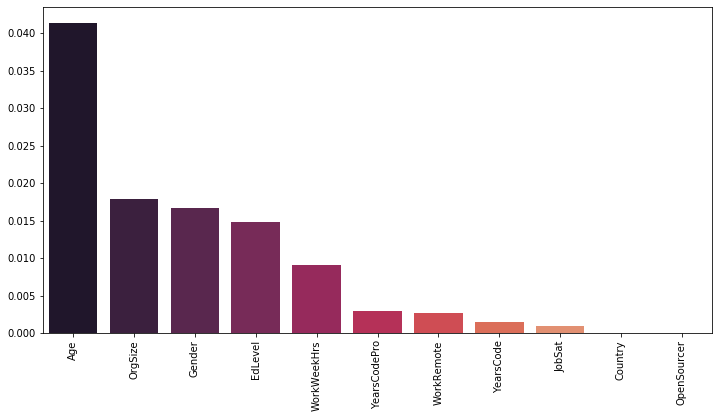

In [300]:
# Check columns by missing values
missing_cols_percentage = (df.isna().sum() / len(df)).sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.xticks(plt.xticks()[0], missing_cols_percentage.index, rotation=90)
sns.barplot(x = missing_cols_percentage.index, y = missing_cols_percentage.values, palette='rocket');


In [301]:
# Only age column is missing 4 percent of values. But that's ok. 
# However we could have a threshold like 25% and drop columns accordingly
missing_cols = ((df.isna().sum() / len(df)).sort_values(ascending=False) > .25)
missing_cols = missing_cols[missing_cols.values == True].index.tolist()
df = df.drop(missing_cols, axis=1)

In [265]:
# Fill numeric columns with the mean
num_vars = df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace=True)

In [266]:
# Dummy the categorical variables
cat_vars = df.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, 
                                                         prefix_sep='_', drop_first=True)], axis=1)

In [267]:
X = df

In [288]:
# Create a Gradient Boosting Regressor
from sklearn.model_selection import train_test_split
from sklearn import ensemble

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

params = {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(x_train, y_train)
preds = regr.predict(x_test)

In [289]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %.4f" % rmse)

RMSE: 278496.7147


- It appears that the model did not predict the salary well
- As I mentioned above we need to do some feature engineering and dimensionality reduction

In [290]:
# Calculate the r2
regr.score(x_test, y_test)

0.059827504392606756

In [292]:
# Check out feature impotances
feature_importances = pd.DataFrame(regr.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [293]:
feature_importances

,importance
Country_United States,0.190043
Age,0.109980
WorkWeekHrs,0.068391
Country_United Kingdom,0.019296
WorkRemote_Less than once per month / Never,0.018993
...,...
Country_Mauritius,0.000000
Country_Monaco,0.000000
Country_Mongolia,0.000000
Country_Montenegro,0.000000
